Bibliothèques importées avec succès.
Jeu de données chargé depuis : ../data/ratings.csv
Nombre d'enregistrements : 32000204

--- Aperçu des 5 premières lignes du DataFrame ---
   userId  movieId  rating  timestamp
0       1       17     4.0  944249077
1       1       25     1.0  944250228
2       1       29     2.0  943230976
3       1       30     5.0  944249077
4       1       32     5.0  943228858

--- Informations sur le DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 976.6 MB
None

--- Statistiques descriptives du DataFrame ---
             userId       movieId        rating     timestamp
count  3.200020e+07  3.200020e+07  3.200020e+07  3.200020e+07
mean   1.002785e+05  2.931861e+04  3.540396e+00  1.275241e+09
std    5

C:\Users\abdel\AppData\Local\Temp\ipykernel_7552\1930059636.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df_ratings, palette='viridis')


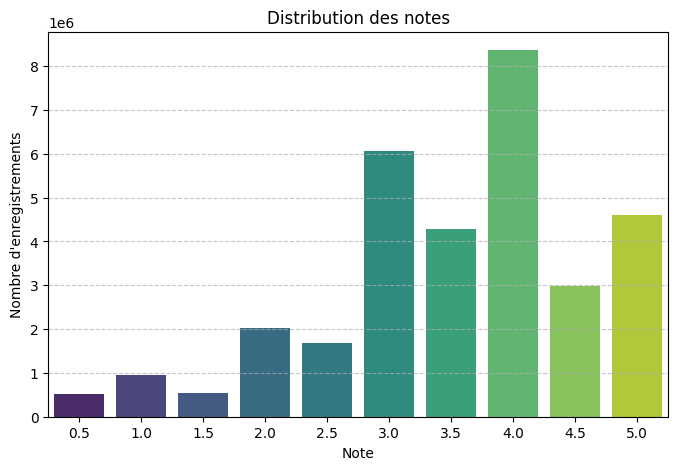


--- Top 10 des films les plus notés (par nombre d'évaluations) ---
movieId
318     102929
356     100296
296      98409
2571     93808
593      90330
260      85010
2959     77332
480      75233
527      73849
4993     73122
Name: count, dtype: int64

--- Top 10 des utilisateurs les plus actifs (par nombre d'évaluations) ---
userId
175325    33332
17035      9577
55653      9178
123465     9044
171795     9016
10202      7748
198515     7594
49305      7488
22744      7372
7858       7322
Name: count, dtype: int64

Sparsité de la matrice utilisateur-film : 99.81%

--- Aperçu du DataFrame avec les IDs mappés ---
   userId  movieId  rating  timestamp  user_id_mapped  movie_id_mapped
0       1       17     4.0  944249077               0                0
1       1       25     1.0  944250228               0                1
2       1       29     2.0  943230976               0                2
3       1       30     5.0  944249077               0                3
4       1       32     5.

In [3]:
# -*- coding: utf-8 -*-
"""
# 1_EDA_Preprocessing.ipynb

Ce notebook est dédié à l'exploration des données (EDA) et au prétraitement pour le projet DeepRec.
Nous allons charger le jeu de données MovieLens, l'inspecter, effectuer une analyse exploratoire
et préparer les données pour l'entraînement des modèles de recommandation.
"""

# 1. Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

print("Bibliothèques importées avec succès.")

# 2. Chargement du jeu de données MovieLens

try:
    # Chemin vers le fichier de ratings
    ratings_path = '../data/ratings.csv'
    # Charger les données de ratings
    # Les colonnes typiques sont 'userId', 'movieId', 'rating', 'timestamp'
    df_ratings = pd.read_csv(ratings_path)
    print(f"Jeu de données chargé depuis : {ratings_path}")
    print(f"Nombre d'enregistrements : {len(df_ratings)}")
except FileNotFoundError:
    print(f"Erreur : Le fichier {ratings_path} n'a pas été trouvé.")
    print("Veuillez vous assurer que le fichier 'ratings.csv' est dans le dossier 'data/'.")
    print("Tu peux télécharger le jeu de données MovieLens ici : https://grouplens.org/datasets/movielens/")
    exit() # Quitte le script si le fichier n'est pas trouvé

# 3. Inspection initiale des données
print("\n--- Aperçu des 5 premières lignes du DataFrame ---")
print(df_ratings.head())

print("\n--- Informations sur le DataFrame ---")
print(df_ratings.info())

print("\n--- Statistiques descriptives du DataFrame ---")
print(df_ratings.describe())

# Vérifier les valeurs manquantes
print("\n--- Vérification des valeurs manquantes ---")
print(df_ratings.isnull().sum())


# 4. Analyse Exploratoire des Données (EDA)

# Nombre d'utilisateurs et de films uniques
n_users = df_ratings['userId'].nunique()
n_movies = df_ratings['movieId'].nunique()
print(f"\nNombre d'utilisateurs uniques : {n_users}")
print(f"Nombre de films uniques : {n_movies}")

# Distribution des notes
print("\n--- Distribution des notes ---")
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=df_ratings, palette='viridis')
plt.title('Distribution des notes')
plt.xlabel('Note')
plt.ylabel('Nombre d\'enregistrements')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Films les plus notés (par nombre de notes)
print("\n--- Top 10 des films les plus notés (par nombre d'évaluations) ---")
top_rated_movies = df_ratings['movieId'].value_counts().head(10)
print(top_rated_movies)

# Utilisateurs les plus actifs (par nombre de notes)
print("\n--- Top 10 des utilisateurs les plus actifs (par nombre d'évaluations) ---")
most_active_users = df_ratings['userId'].value_counts().head(10)
print(most_active_users)

# Matrice de ratings (peut être très sparse)
total_possible_ratings = n_users * n_movies
actual_ratings = len(df_ratings)
sparsity = (1 - actual_ratings / total_possible_ratings) * 100
print(f"\nSparsité de la matrice utilisateur-film : {sparsity:.2f}%")

# 5. Prétraitement des données pour les modèles
# Créer des IDs numériques séquentiels pour les utilisateurs et les films

# Mapping des IDs d'utilisateurs
unique_users = df_ratings['userId'].unique()
user_to_id = {user: i for i, user in enumerate(unique_users)}
id_to_user = {i: user for user, i in user_to_id.items()}
df_ratings['user_id_mapped'] = df_ratings['userId'].map(user_to_id)

# Mapping des IDs de films
unique_movies = df_ratings['movieId'].unique()
movie_to_id = {movie: i for i, movie in enumerate(unique_movies)}
id_to_movie = {i: movie for movie, i in movie_to_id.items()}
df_ratings['movie_id_mapped'] = df_ratings['movieId'].map(movie_to_id)

print("\n--- Aperçu du DataFrame avec les IDs mappés ---")
print(df_ratings.head())

# Sauvegarder les mappings pour une utilisation future (par exemple, pour afficher les noms de films réels)
np.save('../data/user_to_id.npy', user_to_id)
np.save('../data/id_to_user.npy', id_to_user)
np.save('../data/movie_to_id.npy', movie_to_id)
np.save('../data/id_to_movie.npy', id_to_movie)
print("\nMappings d'IDs sauvegardés dans le dossier 'data/'.")

# 6. Division des données en ensembles d'entraînement, de validation et de test
# Nous allons diviser les données en 80% entraînement, 10% validation, 10% test.
# La validation est utilisée pour l'ajustement des hyperparamètres pendant l'entraînement.

# D'abord, diviser en entraînement + validation et test
train_val_df, test_df = train_test_split(
    df_ratings,
    test_size=0.1, # 10% pour le test
    random_state=42, # Pour la reproductibilité
    stratify=df_ratings['userId'] # Stratifier par utilisateur pour s'assurer que chaque utilisateur est représenté dans les deux ensembles
)

# Ensuite, diviser l'ensemble entraînement + validation en entraînement et validation
train_df, val_df = train_test_split(
    train_val_df,
    test_size=(0.1 / 0.9), # 10% de l'original / (1 - 10% test) = 10% / 90%
    random_state=42,
    stratify=train_val_df['userId']
)

print(f"\nDimensions de l'ensemble d'entraînement : {train_df.shape}")
print(f"Dimensions de l'ensemble de validation : {val_df.shape}")
print(f"Dimensions de l'ensemble de test : {test_df.shape}")

# Sauvegarder les ensembles de données prétraitées
train_df.to_csv('../data/train_ratings.csv', index=False)
val_df.to_csv('../data/val_ratings.csv', index=False)
test_df.to_csv('../data/test_ratings.csv', index=False)
print("\nEnsembles de données (entraînement, validation, test) sauvegardés dans le dossier 'data/'.")

print("\n--- Prétraitement des données terminé avec succès ! ---")